In [1]:
# Plot Tools
import pickle
import numpy as np
import math
# import matplotlib.pyplot as plt
# %matplotlib inline

# from matplotlib import cycler
# colors = cycler('color', 
#        ['#EE6666', '#3388BB', '#9988DD', '#EECC55', 
#        '#88BB44', '#FFBBBB'])

# plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
#       axisbelow=True, grid=True, prop_cycle=colors)
# plt.rc('grid', color='w', linestyle='solid')
# plt.rc('xtick', direction='out', color='gray')
# plt.rc('ytick', direction='out', color='gray')
# plt.rc('patch', edgecolor='#E6E6E6')
# plt.rc('lines', linewidth=2)

In [2]:
# Import Data
%cd /home/nbuser/library/DP/Data/DATA/

/home/nbuser/library/DP/Data/DATA


In [5]:
with open('IA.pickle', 'rb') as handle:
    ax, ay, an, av = pickle.load(handle)
# with open('99C.pickle', 'rb') as handle:
#     x, y, n, v = pickle.load(handle)

In [6]:
len(ax)

2954

In [204]:
def rdim(x, dim):
    ''' Remove Dimension so we can Graph '''
    return np.asarray([np.delete(i.T, dim, 0).T for i in x])

In [205]:
XX = rdim(ax, 0)
xx = rdim(x, 0)

In [3]:
def regression(x, y, b, index, also=None):
    fig, ax = plt.subplots(figsize = (8,6))
    l = np.linspace(0, 1, 5)
    if index is not None:
        ax.scatter(x[index], y[index])
        if b is not None:
            if also is not None:
                line = lambda x, b: b[index][also][1]*x + b[index][also][0]
            else:
                line = lambda x, b: b[index][1]*x + b[index][0]
    else:
        ax.scatter(x, y)
        if b is not None:
            if also is not None:
                line = lambda x, b: b[also][1]*x + b[also][0]
            else:
                line = lambda x, b: b[1]*x + b[0]
    if b is not None:
        ax.plot(l, line(l, b))
    ax.set_xlim(-0.025, 1.025)
    ax.set_ylim(-0.025, 1.025)
    ax.grid(which='minor', color='w', alpha=0.3)
    plt.show()

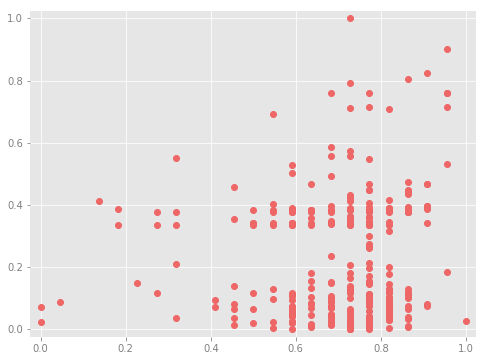

In [209]:
regression(XX, ay, None, None, None)

In [547]:
def laplace(ε=None, method=["DP"], Scale=None, A=''):
    fig, ax = plt.subplots(figsize = (8,6))
    bound = 20
    l = np.linspace(-bound, bound, 2500)
    lap = lambda x, b: (1 / (2 * (1/b))) * np.exp(-(np.abs(x)/(1/b)))
    if Scale is not None:
        S = Scale
        if "In" in method:
            Y = 0.525
        if "Out" in method:
            Y = 0.525 * S
    else:
        S = 1
        Y = 0.525
    
    if ε is None: 
        ε = np.flip(np.linspace(0.1, 1, 200))
        for i in ε:
            if "DP" in method:
                ax.plot(l, lap(l, i), color=plt.cm.jet(i), alpha=1, linewidth=0.75)
#                 ax.set_title(r"$\mathcal{L}(0,b)$; $b = 1/ε  $", pad=10)
            else:
                if "In" in method:
                    ax.plot(l, np.sqrt(2) * i * lap(l, 1/(S * np.sqrt(2))), color=plt.cm.jet(i), alpha=1, linewidth=0.75)
#                     ax.set_title(r"$ \mathcal{L}(0,b)/ε$; $b = %s / \sqrt{2}  $"%str(S), pad=10)
                elif "Out" in method:
                    ax.plot(l, np.sqrt(2) * S* i * lap(l, 1/np.sqrt(2)), color=plt.cm.jet(i), alpha=1, linewidth=0.75)
#                     ax.set_title(r"$ %s/ε  \times \mathcal{L}(0,b)$; $b = 1/ \sqrt{2} $"%str(S), pad=10)
                
                
    else:
        ax.plot(l, lap(l, ε))
    ax.set_xlim(-bound, bound)
    ax.set_ylim(-0.025, Y)
    ax.grid(which='minor', color='w', alpha=0.3)
    ax.set_xlabel("x")
    ax.set_ylabel(r"$\mathcal{L}(x|μ, b)$")
    %cd /home/nbuser/library/DP/FIGURES/
    plt.savefig(A)
    plt.show()

/home/nbuser/library/DP/FIGURES


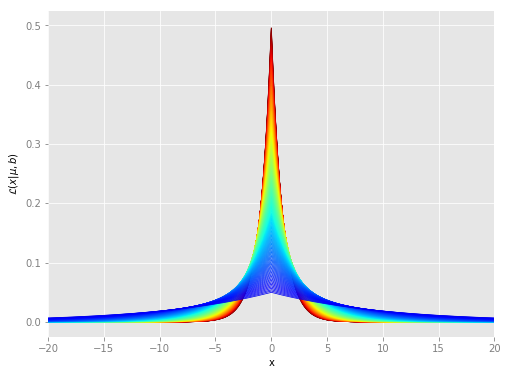

In [548]:
laplace(A='L0')

/home/nbuser/library/DP/FIGURES


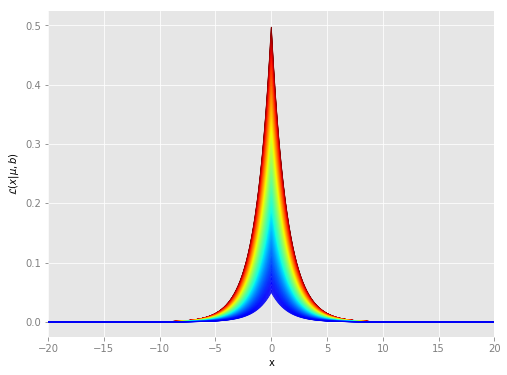

In [549]:
laplace(method=["In"], A='L1')

/home/nbuser/library/DP/FIGURES


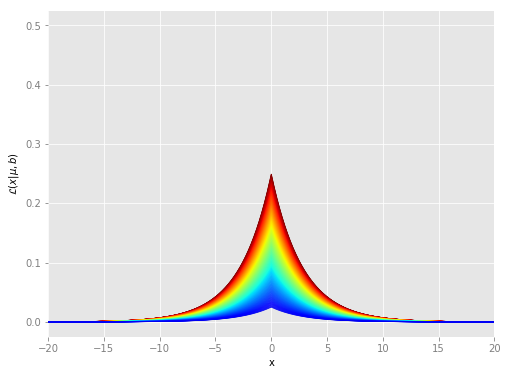

In [550]:
laplace(method=["In"], Scale=2, A='L2')

/home/nbuser/library/DP/FIGURES


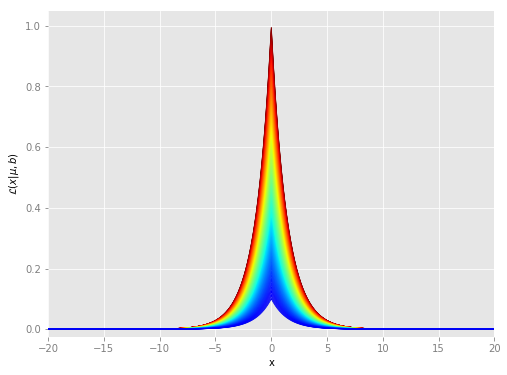

In [551]:
laplace(method=["Out"], Scale=2, A='L3')

In [543]:
def normal(ε=None, NOR=True, B=False):
    fig, ax = plt.subplots(figsize = (8,6))
    bound = 50
    nor = lambda x, σ: 1/(np.sqrt(2 * math.pi * np.square(σ))) * np.exp(-np.square(x)/(2 * np.square(σ)))
    if ε is None: 
        ε = np.flip(np.linspace(0.1, 1, 100))
        for i in ε:
            if NOR:
                l = np.linspace(-bound, bound, 2500)
                σσ = np.sqrt(2 * np.log(1.25 / 1e-50)) / i
                ax.plot(l, nor(l, σσ), color=plt.cm.jet(i), alpha=1, linewidth=0.75)
                ax.set_ylabel(r"$\mathcal{N}(μ,σ^2)$")
#                 ax.set_title(r"$\mathcal{N}(0,σ^2)$; $σ^2 = (\frac{Δf}{ε} \ln \left(\frac{1.25}{δ}\right))^2 $", pad=10)
                if B:
                    ax.set_xlim(-bound, bound)
                else:
                    ax.set_xlim(-5, 5)
                ax.set_ylim(-0.001, 0.05)
            else:
                l = np.linspace(-5, 5, 2500)
                ax.plot(l, np.sqrt(2) * i * nor(l, 1), color=plt.cm.jet(i), alpha=1, linewidth=0.75)
                ax.set_xlim(-5, 5)
                ax.set_ylabel("$\mathcal{N}(0,1)$")
#                 ax.set_title("Standard Normal Distribution", pad=10)
#                 ax.set_ylim(-0.025, 1)
    else:
        ax.plot(l, nor(l, ε))
#     ax.set_ylim(-0.025, 0.525)
    ax.grid(which='minor', color='w', alpha=0.3)
    ax.set_xlabel("x")
    %cd /home/nbuser/library/DP/FIGURES/
    if NOR:    
        if B:
            plt.savefig('N0.png')
        else:
            plt.savefig('N1.png')
    else:
        plt.savefig('N2.png')
    plt.show()

/home/nbuser/library/DP/FIGURES


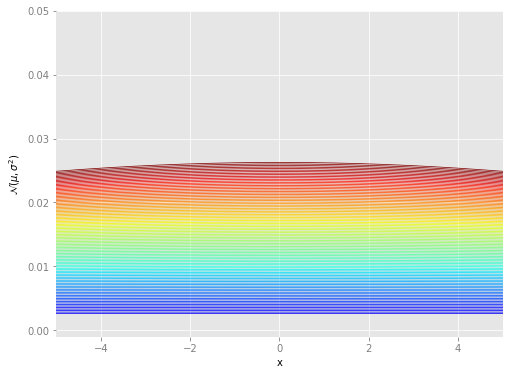

In [544]:
normal(NOR=True, B=False)

/home/nbuser/library/DP/FIGURES


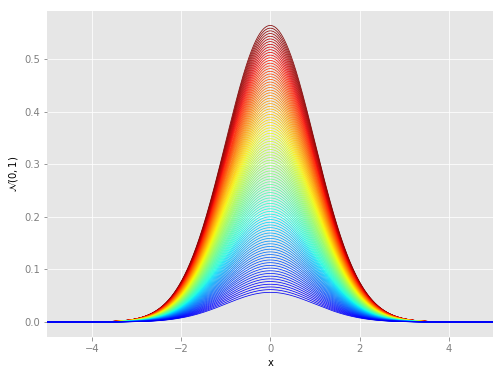

In [545]:
normal(NOR=False)

/home/nbuser/library/DP/FIGURES


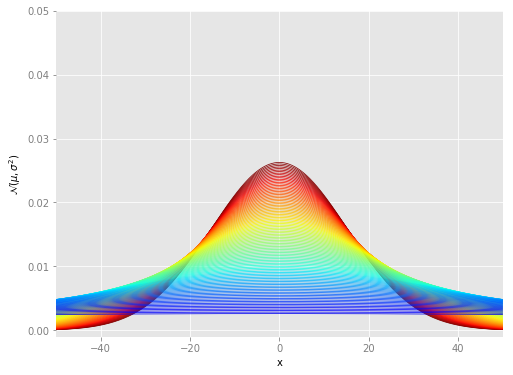

In [546]:
normal(NOR=True, B=True)

In [ ]:
# MSE graph

In [15]:
from scipy.interpolate import UnivariateSpline, interpolate

In [539]:
def MSE(Y, A='none'):
    fig, ax = plt.subplots(figsize = (8,6))
    
    x = [j/10 for j in range(1, 11)]
    xnew = np.linspace(0.1,1,500)
    
    ny = []
    for y in Y:
        y[y > 1] = 1.5
        y[y==np.nan] = 2
        if y[0] > 1:
            if y[3] < 0.4:
                ss = 0.1
                kk = 2
            elif y[8] < 0.25:
                ss = 0.1
                kk = 3 
            elif y[2] < 1:
                ss = 1
                kk = 3
            else:
                ss = 1
                kk = 5
        elif y[0] > 0.5:
            if y[1] < 0.2:
                ss = 0
                kk = 2
            else:
                ss = 0.01
                kk = 5
        else:
            ss = 5
            kk = 2
        intrp = UnivariateSpline(x, y, k=kk, s=ss)
        ny.append(intrp(xnew))
        plt.plot(x, y, 'o', markersize=2, alpha=0.5, color='black')
    
    plt.plot(xnew, ny[0], label="ℒMOS", color='black')
    plt.plot(xnew, ny[1], label="ℒMAD", linestyle='-', linewidth=3)
    plt.plot(xnew, ny[2], label="ℒPTR", linestyle='-', linewidth=3)
    plt.plot(xnew, ny[3], label="$\mathcal{N}$MOS", color='gray', linestyle=':', alpha=0.5)
    plt.plot(xnew, ny[4], label="$\mathcal{N}$MAD", color='red', linestyle=':', linewidth=2, alpha=0.5)
    plt.plot(xnew, ny[5], label="$\mathcal{N}$PTR", color='blue', linestyle=':', linewidth=2, alpha=0.5)
        
    ax.set_ylabel("MSE")
    ax.set_xlabel("ε")
            
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
    ax.grid(which='minor', color='w', alpha=0.3)
    ax.set_ylim(-0.025, 1)
    %cd /home/nbuser/library/DP/FIGURES/
    plt.savefig(A, bbox_inches='tight')
    plt.show()

In [21]:
def f(y):
    return np.asarray(y).flatten()

In [526]:
# T = True

In [541]:
# Figure MSE
%cd /home/nbuser/library/DP/Data/MSE/MOS
with open('M99O.pickle', 'rb') as handle:
    mo0, mo1, mo2 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/MAD
with open('MAD99O.pickle', 'rb') as handle:
    Mo0, Mo1 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/IQR
with open('I99O.pickle', 'rb') as handle:
    Io0, Io1 = pickle.load(handle)
    
%cd /home/nbuser/library/DP/Data/MSE/MOS
with open('M99W.pickle', 'rb') as handle:
    mw0, mw1, mw2 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/MAD
with open('MAD99W.pickle', 'rb') as handle:
    Mw0, Mw1 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/IQR
with open('I99W.pickle', 'rb') as handle:
    Iw0, Iw1 = pickle.load(handle)
    
%cd /home/nbuser/library/DP/Data/MSE/MOS
with open('M99M.pickle', 'rb') as handle:
    mm0, mm1, mm2 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/MAD
with open('MAD99M.pickle', 'rb') as handle:
    Mm0, Mm1 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/IQR
with open('I99M.pickle', 'rb') as handle:
    Im0, Im1 = pickle.load(handle)
    
%cd /home/nbuser/library/DP/Data/MSE/MOS
with open('M99S.pickle', 'rb') as handle:
    ms0, ms1, ms2 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/MAD
with open('MAD99S.pickle', 'rb') as handle:
    Ms0, Ms1 = pickle.load(handle)
%cd /home/nbuser/library/DP/Data/MSE/IQR
with open('I99S.pickle', 'rb') as handle:
    Is0, Is1 = pickle.load(handle)

/home/nbuser/library/DP/Data/MSE/MOS
/home/nbuser/library/DP/Data/MSE/MAD
/home/nbuser/library/DP/Data/MSE/IQR
/home/nbuser/library/DP/Data/MSE/MOS
/home/nbuser/library/DP/Data/MSE/MAD
/home/nbuser/library/DP/Data/MSE/IQR
/home/nbuser/library/DP/Data/MSE/MOS
/home/nbuser/library/DP/Data/MSE/MAD
/home/nbuser/library/DP/Data/MSE/IQR
/home/nbuser/library/DP/Data/MSE/MOS
/home/nbuser/library/DP/Data/MSE/MAD
/home/nbuser/library/DP/Data/MSE/IQR


In [381]:
%cd /home/nbuser/library/DP/Data/MSE/LOCAL
# Figure MSE
with open('LMADSO.pickle', 'rb') as handle:
    Mo0, Mo1 = pickle.load(handle)
with open('LISO.pickle', 'rb') as handle:
    Io0, Io1 = pickle.load(handle)
    
with open('LMADSW.pickle', 'rb') as handle:
    Mw0, Mw1 = pickle.load(handle)
with open('LISW.pickle', 'rb') as handle:
    Iw0, Iw1 = pickle.load(handle)
    
with open('LMADSM.pickle', 'rb') as handle:
    Mm0, Mm1 = pickle.load(handle)
with open('LISM.pickle', 'rb') as handle:
    Im0, Im1 = pickle.load(handle)
    
with open('LMADSS.pickle', 'rb') as handle:
    Ms0, Ms1 = pickle.load(handle)
with open('LISS.pickle', 'rb') as handle:
    Is0, Is1 = pickle.load(handle)
# Total
print(len(Mo0))
print("OLS")
print(nanny(Mo0), nanny(Mo1))
print(nanny(Io0), nanny(Io1))
print("")
print("W")
print(nanny(Mw0), nanny(Mw1))
print(nanny(Iw0), nanny(Iw1))
print("")
print("M")
print(nanny(Mm0), nanny(Mm1))
print(nanny(Im0), nanny(Im1))
print("")
print("S")
print(nanny(Ms0), nanny(Ms1))
print(nanny(Is0), nanny(Is1))

/home/nbuser/library/DP/Data/MSE/LOCAL
111
OLS
111 111
56 61

W
111 111
72 64

M
111 111
86 79

S
111 111
87 80


In [383]:
%cd /home/nbuser/library/DP/Data/MSE/LOCAL
# Figure MSE
with open('LMADIAO.pickle', 'rb') as handle:
    Mo0, Mo1 = pickle.load(handle)
with open('LIIAO.pickle', 'rb') as handle:
    Io0, Io1 = pickle.load(handle)
    
with open('LMADIAW.pickle', 'rb') as handle:
    Mw0, Mw1 = pickle.load(handle)
with open('LIIAW.pickle', 'rb') as handle:
    Iw0, Iw1 = pickle.load(handle)
    
with open('LMADIAM.pickle', 'rb') as handle:
    Mm0, Mm1 = pickle.load(handle)
with open('LIIAM.pickle', 'rb') as handle:
    Im0, Im1 = pickle.load(handle)
    
with open('LMADIAS.pickle', 'rb') as handle:
    Ms0, Ms1 = pickle.load(handle)
with open('LIIAS.pickle', 'rb') as handle:
    Is0, Is1 = pickle.load(handle)
# Total
print(len(Mo0))
print("OLS")
print(nanny(Mo0), nanny(Mo1))
print(nanny(Io0), nanny(Io1))
print("")
print("W")
print(nanny(Mw0), nanny(Mw1))
print(nanny(Iw0), nanny(Iw1))
print("")
print("M")
print(nanny(Mm0), nanny(Mm1))
print(nanny(Im0), nanny(Im1))
print("")
print("S")
print(nanny(Ms0), nanny(Ms1))
print(nanny(Is0), nanny(Is1))

/home/nbuser/library/DP/Data/MSE/LOCAL
100
OLS
91 93
11 10

W
99 100
57 52

M
93 94
48 51

S
96 95
36 33


In [379]:
%cd /home/nbuser/library/DP/Data/MSE/LOCAL
# Figure MSE
with open('LMAD99O.pickle', 'rb') as handle:
    Mo0, Mo1 = pickle.load(handle)
with open('LI99O.pickle', 'rb') as handle:
    Io0, Io1 = pickle.load(handle)
    
with open('LMAD99W.pickle', 'rb') as handle:
    Mw0, Mw1 = pickle.load(handle)
with open('LI99W.pickle', 'rb') as handle:
    Iw0, Iw1 = pickle.load(handle)
    
with open('LMAD99M.pickle', 'rb') as handle:
    Mm0, Mm1 = pickle.load(handle)
with open('LI99M.pickle', 'rb') as handle:
    Im0, Im1 = pickle.load(handle)
    
with open('LMAD99S.pickle', 'rb') as handle:
    Ms0, Ms1 = pickle.load(handle)
with open('LI99S.pickle', 'rb') as handle:
    Is0, Is1 = pickle.load(handle)
# Total
print(len(Mo0))
print("OLS")
print(nanny(Mo0), nanny(Mo1))
print(nanny(Io0), nanny(Io1))
print("")
print("W")
print(nanny(Mw0), nanny(Mw1))
print(nanny(Iw0), nanny(Iw1))
print("")
print("M")
print(nanny(Mm0), nanny(Mm1))
print(nanny(Im0), nanny(Im1))
print("")
print("S")
print(nanny(Ms0), nanny(Ms1))
print(nanny(Is0), nanny(Is1))

5
OLS
3 4
0 0

W
4 5
0 0

M
5 5
0 0

S
5 5
0 0


In [373]:
def nanny(x):
    p = [not np.any(i) for i in np.isnan(x)]
    return len(x[p])